# Covid Dataset for India 
Kaggle sourced public dataset


libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
ds = pd.read_csv('covid_19_india.csv',index_col=0)
ds["ConfirmedIndianNational"].replace({"-": "0"}, inplace=True)
ds["ConfirmedForeignNational"].replace({"-": "0"}, inplace=True)
ds['ConfirmedIndianNational'] = pd.to_numeric(ds['ConfirmedIndianNational'])
ds['ConfirmedForeignNational'] = pd.to_numeric(ds['ConfirmedForeignNational'])
print(ds.head())
print(ds.shape)


         Date     Time State/UnionTerritory  ConfirmedIndianNational  \
Sno                                                                    
1    30/01/20  6:00 PM               Kerala                        1   
2    31/01/20  6:00 PM               Kerala                        1   
3    01/02/20  6:00 PM               Kerala                        2   
4    02/02/20  6:00 PM               Kerala                        3   
5    03/02/20  6:00 PM               Kerala                        3   

     ConfirmedForeignNational  Cured  Deaths  Confirmed  
Sno                                                      
1                           0      0       0          1  
2                           0      0       0          1  
3                           0      0       0          2  
4                           0      0       0          3  
5                           0      0       0          3  
(894, 8)


In [4]:
ds.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,894.000000,894.000000,894.000000,894.000000,894.000000
mean,6.080537,0.746085,5.876957,2.002237,73.624161
std,16.410202,2.633100,16.207517,8.154169,170.271306
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,13.000000
75%,3.000000,0.000000,4.000000,1.000000,52.000000
max,177.000000,14.000000,208.000000,127.000000,1761.000000


894 data points sorted over 74 days (length of dates) exciting right ?

In [5]:
states = ds['State/UnionTerritory'].unique()
print(states)
dates = ds['Date'].unique()
print(len(dates))


['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura']
74


In [6]:
res = []
for i in range(0,len(states),1) :  
 print( ds.loc[ds['State/UnionTerritory'] == states[i]])
   


         Date     Time State/UnionTerritory  ConfirmedIndianNational  \
Sno                                                                    
1    30/01/20  6:00 PM               Kerala                        1   
2    31/01/20  6:00 PM               Kerala                        1   
3    01/02/20  6:00 PM               Kerala                        2   
4    02/02/20  6:00 PM               Kerala                        3   
5    03/02/20  6:00 PM               Kerala                        3   
..        ...      ...                  ...                      ...   
755  08/04/20  5:00 PM               Kerala                        0   
786  09/04/20  5:00 PM               Kerala                        0   
817  10/04/20  5:00 PM               Kerala                        0   
848  11/04/20  5:00 PM               Kerala                        0   
879  12/04/20  5:00 PM               Kerala                        0   

     ConfirmedForeignNational  Cured  Deaths  Confirmed  
Sno  

In [7]:
#lets analyse state by state
#first state kerala
kerala_data = ds.loc[ds['State/UnionTerritory'] == 'Kerala',]

k_data_cont = []
#making data continous total number of dates till date for every date
#lets have some fun
for i in range(len(kerala_data)):
    k_data_cont.append(kerala_data.iloc[:i,3].sum())
        
print(len(k_data_cont ))
print(k_data_cont)


74
[0, 1, 2, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 117, 126, 141, 158, 175, 194, 213, 235, 258, 282, 307, 332, 358, 391, 436, 496, 583, 684, 794, 923, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091, 1091]


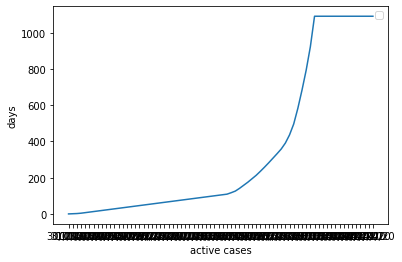

In [8]:
%matplotlib inline
plt.xlabel('active cases')
plt.ylabel('days')
plt.legend('kerala')
plt.plot(dates,k_data_cont)

## Country Wide?
country wide data needs to be sorted data wise with some dates having more than 1 point
writing a for loop


In [12]:
d_count = []
for i in range(len(dates)):
    d_count.append(ds.iloc[:i,3].cumsum())
print(list(d_count))
        




[Series([], Name: ConfirmedIndianNational, dtype: int64), Sno
1    1
Name: ConfirmedIndianNational, dtype: int64, Sno
1    1
2    2
Name: ConfirmedIndianNational, dtype: int64, Sno
1    1
2    2
3    4
Name: ConfirmedIndianNational, dtype: int64, Sno
1    1
2    2
3    4
4    7
Name: ConfirmedIndianNational, dtype: int64, Sno
1     1
2     2
3     4
4     7
5    10
Name: ConfirmedIndianNational, dtype: int64, Sno
1     1
2     2
3     4
4     7
5    10
6    13
Name: ConfirmedIndianNational, dtype: int64, Sno
1     1
2     2
3     4
4     7
5    10
6    13
7    16
Name: ConfirmedIndianNational, dtype: int64, Sno
1     1
2     2
3     4
4     7
5    10
6    13
7    16
8    19
Name: ConfirmedIndianNational, dtype: int64, Sno
1     1
2     2
3     4
4     7
5    10
6    13
7    16
8    19
9    22
Name: ConfirmedIndianNational, dtype: int64, Sno
1      1
2      2
3      4
4      7
5     10
6     13
7     16
8     19
9     22
10    25
Name: ConfirmedIndianNational, dtype: int64, Sno
1      1